<a href="https://colab.research.google.com/github/vpedrozamunoz-cyber/Class-Project-Repository/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [332]:
#taking a look at the dataset and trying to figure out what the dataset looks like before I start.

print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (101766, 50)

Column names:
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data types and no

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [333]:
df.sample(5,)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
56820,162811218,39431142,Caucasian,Female,[40-50),?,3,1,1,6,...,No,Down,No,No,No,No,No,Ch,Yes,<30
81848,254208900,56980809,AfricanAmerican,Female,[80-90),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,>30
55968,161156196,88838172,Caucasian,Female,[80-90),?,2,3,7,3,...,No,No,No,No,No,No,No,No,No,>30
54386,158359476,52701984,AfricanAmerican,Female,[60-70),?,2,1,7,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
65402,182285310,2842200,AfricanAmerican,Female,[20-30),?,2,1,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [334]:
df.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
#got rid of columns that

columns_to_drop = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   encounter_id  101766 non-null  int64 
 1   patient_nbr   101766 non-null  int64 
 2   race          101766 non-null  object
 3   gender        101766 non-null  object
 4   age           101766 non-null  object
 5   weight        101766 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.7+ MB


In [336]:
#this is to change datatypes to integers
#df['mean_score'] = pd.to_numeric(df['mean_score'], errors='coerce')

#changing datatypes to categorical

#Race, gender, age, weight (change to category)

df['race'] = df['race'].astype('category')

df['gender'] = df['gender'].astype('category')

df['age'] = df['age'].astype('category')

df['weight'] = df['weight'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   encounter_id  101766 non-null  int64   
 1   patient_nbr   101766 non-null  int64   
 2   race          101766 non-null  category
 3   gender        101766 non-null  category
 4   age           101766 non-null  category
 5   weight        101766 non-null  category
dtypes: category(4), int64(2)
memory usage: 1.9 MB


In [337]:
df['weight'].unique()[:20]

['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200']
Categories (10, object): ['>200', '?', '[0-25)', '[100-125)', ..., '[175-200)', '[25-50)',
                          '[50-75)', '[75-100)']

In [338]:
#I used this to replace the question marks with the Unknown.

df['weight'] = df['weight'].replace('?', 'Unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   encounter_id  101766 non-null  int64   
 1   patient_nbr   101766 non-null  int64   
 2   race          101766 non-null  category
 3   gender        101766 non-null  category
 4   age           101766 non-null  category
 5   weight        101766 non-null  category
dtypes: category(4), int64(2)
memory usage: 1.9 MB


/tmp/ipython-input-1548280126.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['weight'] = df['weight'].replace('?', 'Unknown')


In [339]:
#wanted to see the weight categories

df['weight'].unique()[:20]

['Unknown', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200']
Categories (10, object): ['>200', 'Unknown', '[0-25)', '[100-125)', ..., '[175-200)', '[25-50)',
                          '[50-75)', '[75-100)']

In [340]:
df['age'] = df['age'].replace('?', 'Unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   encounter_id  101766 non-null  int64   
 1   patient_nbr   101766 non-null  int64   
 2   race          101766 non-null  category
 3   gender        101766 non-null  category
 4   age           101766 non-null  category
 5   weight        101766 non-null  category
dtypes: category(4), int64(2)
memory usage: 1.9 MB


In [341]:
#Wanted to see the age categories

df['age'].unique()[:20]

['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)',
                          '[80-90)', '[90-100)']

In [342]:
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
encounter_id    0
patient_nbr     0
race            0
gender          0
age             0
weight          0
dtype: int64

Percentage of missing values per column:
encounter_id    0.0
patient_nbr     0.0
race            0.0
gender          0.0
age             0.0
weight          0.0
dtype: float64

Number of unique values per column:
encounter_id    101766
patient_nbr      71518
race                 6
gender               3
age                 10
weight              10
dtype: int64


In [343]:
##Wanted to see the race categories
print(df['race'].unique())

['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic']
Categories (6, object): ['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']


In [344]:
##Wanted to see the gender categories
print(df['gender'].unique())

['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']


In [345]:
##Wanted to see the age categories
print(df['age'].unique())

['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)',
                          '[80-90)', '[90-100)']


In [346]:
##Wanted to see the weight categories
print(df['weight'].unique())

['Unknown', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200']
Categories (10, object): ['>200', 'Unknown', '[0-25)', '[100-125)', ..., '[175-200)', '[25-50)',
                          '[50-75)', '[75-100)']


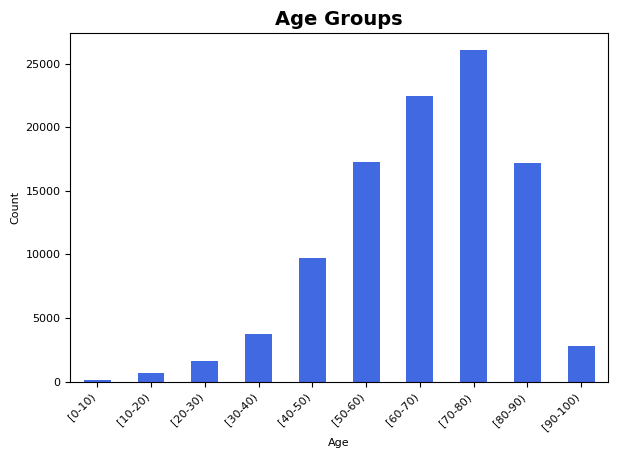

In [347]:
#created and adjusted the graph to my liking for the overall age groups in the entire dataset

age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

df['age'].value_counts().reindex(age_order).plot.bar(legend=False, color='royalblue')

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.serif'] = ['Helvetica']
mpl.rcParams['font.size'] = 14

plt.title('Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=8) # Smaller font size
plt.ylabel('Count', fontsize=8) # Smaller font size
plt.xticks(rotation=45, ha='right', fontsize=8) # Smaller font size
plt.yticks(fontsize=8) # Smaller font size
plt.ticklabel_format(style='plain', axis='y') # Add commas to y-axis
plt.tight_layout()
plt.show()

In [348]:
#only ppl ages 20-30

tw_df = df[df['age'] == '[20-30)'].copy()

tw_df.head()

,encounter_id,patient_nbr,race,gender,age,weight
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown
28,250872,41606064,Caucasian,Male,[20-30),Unknown
128,2140146,53612379,AfricanAmerican,Female,[20-30),Unknown
143,2309376,41606064,Caucasian,Male,[20-30),Unknown
191,2595384,3151539,AfricanAmerican,Male,[20-30),Unknown


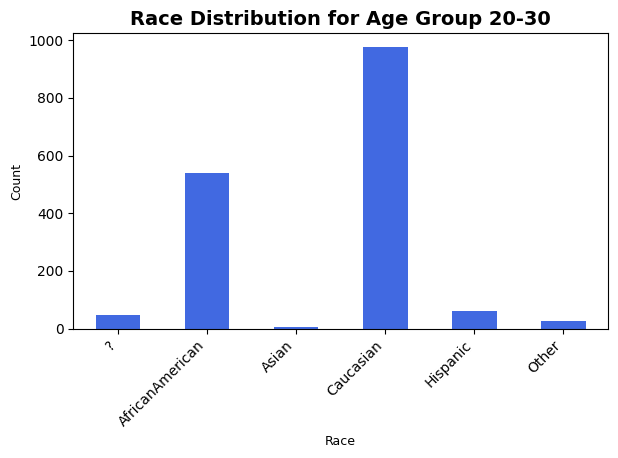

In [349]:
#Created a graph for the race distribution for the 20-30 age range

tw_df['race'].value_counts().sort_index().plot.bar(legend=False, color='royalblue')

mpl.rcParams['font.family'] = 'sans-serif'  # e.g., 'sans-serif', 'monospace', 'serif'
mpl.rcParams['font.serif'] = ['Helvetica'] # Specify preferred serif font
mpl.rcParams['font.size'] = 14

plt.title('Race Distribution for Age Group 20-30', fontsize=14, fontweight='bold')
plt.xlabel('Race', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(fontsize=10) # Smaller font size
plt.tight_layout()
plt.show()

In [350]:
#only ppl ages 30-40

th_df = df[df['age'] == '[30-40)'].copy()

th_df.head()

,encounter_id,patient_nbr,race,gender,age,weight
3,500364,82442376,Caucasian,Male,[30-40),Unknown
99,1260216,92117574,?,Male,[30-40),Unknown
102,1262736,50253120,Caucasian,Female,[30-40),Unknown
115,1880598,10430154,Caucasian,Female,[30-40),Unknown
125,2095932,276606,AfricanAmerican,Female,[30-40),Unknown


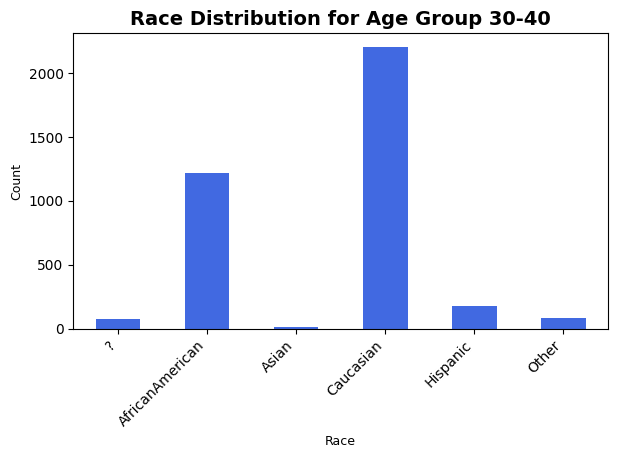

In [351]:
#Created a graph for the race distribution for the 30-40 age range
th_df['race'].value_counts().sort_index().plot.bar(legend=False, color='royalblue')

mpl.rcParams['font.family'] = 'sans-serif'  # e.g., 'sans-serif', 'monospace', 'serif'
mpl.rcParams['font.serif'] = ['Helvetica'] # Specify preferred serif font
mpl.rcParams['font.size'] = 14

plt.title('Race Distribution for Age Group 30-40', fontsize=14, fontweight='bold')
plt.xlabel('Race', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(fontsize=10) # Smaller font size
plt.tight_layout()
plt.show()

In [352]:
#compare race distribution for 20-30

#th_df['race'].value_counts()

print(tw_df['race'].value_counts())



race
Caucasian          975
AfricanAmerican    540
Hispanic            63
?                   46
Other               27
Asian                6
Name: count, dtype: int64


In [353]:
#compare race distribution for 30-40

print(th_df['race'].value_counts())

race
Caucasian          2203
AfricanAmerican    1223
Hispanic            174
Other                84
?                    76
Asian                15
Name: count, dtype: int64


In [354]:
# Across the various age groups, the race that was primarily on the dataset was:

mode_value = tw_df['race'].mode()[0]

print(f"The mode of the 'race' data for the 20-30 age group is: {mode_value}")

mode_value30 = th_df['race'].mode()[0]

print(f"The mode of the 'race' data for the 30-40 age group is: {mode_value30}")


The mode of the 'race' data for the 20-30 age group is: Caucasian
The mode of the 'race' data for the 30-40 age group is: Caucasian


In conclusion, the age group that frequented the hospital the most was 70-80. The race distribution for the age groups of 20-30 and 30-40 with the most visits to the hospital were white. People who identified as Asian, were less likely to go to the hospital in the 20-30 and 30-40 age groups.